In [6]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.circuit.library import MCXGate  # Import MCXGate

# Crear un circuito de 4 cúbits y 4 bits clásicos para Grover
qc_grover = QuantumCircuit(4, 4)

# Aplicar compuertas Hadamard a todos los cúbits
qc_grover.h(range(4))

# Número de iteraciones para Grover (aproximadamente sqrt(2^4) = 4, pero 2 es suficiente)
num_iterations = 2

for _ in range(num_iterations):
    # Oráculo para marcar el estado |1111>
    qc_grover.append(MCXGate(3), [0, 1, 2, 3])  # Aplica una compuerta multi-controlada X

    # Difusor (inversión sobre la media)
    qc_grover.h(range(4))
    qc_grover.x(range(4))
    qc_grover.append(MCXGate(3), [0, 1, 2, 3])  # Aplica una compuerta multi-controlada X
    qc_grover.x(range(4))
    qc_grover.h(range(4))

# Medir los cúbits
qc_grover.measure(range(4), range(4))

# Dibujar el circuito
print(qc_grover.draw())

# Simulación usando el simulador de Qiskit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc_grover, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()

# Obtener resultados y mostrar histograma
counts = result.get_counts()
print(counts)

# Mostrar histograma
histogram = plot_histogram(counts)
plt.show()

     ┌───┐     ┌───┐┌───┐     ┌───┐┌───┐     ┌───┐┌───┐     ┌───┐┌───┐┌─┐      »
q_0: ┤ H ├──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├┤M├──────»
     ├───┤  │  ├───┤├───┤  │  ├───┤├───┤  │  ├───┤├───┤  │  ├───┤├───┤└╥┘┌─┐   »
q_1: ┤ H ├──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├─╫─┤M├───»
     ├───┤  │  ├───┤├───┤  │  ├───┤├───┤  │  ├───┤├───┤  │  ├───┤├───┤ ║ └╥┘┌─┐»
q_2: ┤ H ├──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├─╫──╫─┤M├»
     ├───┤┌─┴─┐├───┤├───┤┌─┴─┐├───┤├───┤┌─┴─┐├───┤├───┤┌─┴─┐├───┤├───┤ ║  ║ └╥┘»
q_3: ┤ H ├┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├┤ H ├─╫──╫──╫─»
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║  ║ »
c: 4/══════════════════════════════════════════════════════════════════╩══╩══╩═»
                                                                       0  1  2 »
«        
«q_0: ───
«        
«q_1: ───
«        
«q_2: ───
«     ┌─┐
«q_3: ┤M├
«     └╥┘
«c: 4/═╩═
«      3 

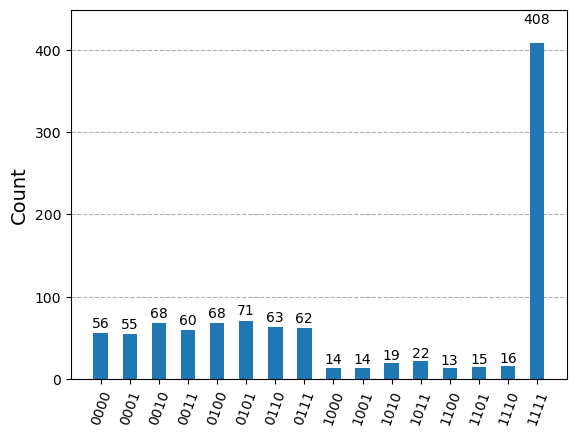

In [7]:
histogram